This file aims to be a collection of python scripts for common graphs. The graphs are categorized into:
1. <a href='#Line Graphs'>line graphs</a>
2. <a href='#Bar Graphs'>bar graphs</a>
3. <a href='#Dot Graphs'>dot graphs</a>
4. <a href='#Area Graphs'>area graphs</a>
5. <a href='#Combo Graphs'>combo graphs</a>
6. <a href='#Specific Graphs'>specific graphs</a>

In [1]:
from sklearn.datasets import load_boston # load dataset
import pandas as pd
import numpy as np
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
print(matplotlib.__version__)
print(sns.__version__)

3.1.0
0.9.0


# Load Data

## Cross-Section Data

Prepare dataset (Boston Housing Data). 

Details of the data are available at:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

In [3]:
boston_fn = load_boston()
data = pd.DataFrame(np.concatenate(
    (boston_fn.data, boston_fn.target.reshape(-1, 1)), axis=1),
                    columns=boston_fn.feature_names.tolist() + ['PRICE'])

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Time-Series Data

Air quality data of Singapore from 2010-2016.

In [5]:
psi = pd.read_csv(
    'https://raw.githubusercontent.com/beverly0005/singapore-nea-psi/master/datasets/sg-nea-psi.csv',
    usecols=range(6),
    header=0,  # Replace existing column names
    names=[
        'Datetime', 'PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
        'PSI-Central'
    ])

psi['Datetime'] = pd.to_datetime(psi['Datetime'])
for i in ['PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
        'PSI-Central']:
    psi[i] = pd.to_numeric(psi[i].str.replace(
        '-', '').apply(lambda x: x.split('-')[0]))
    psi = psi[~psi[i].isna()]
    
# We don't use PSI-Overall provided in the original data
psi['PSI-Overall'] = np.mean(psi[['PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
        'PSI-Central']], axis=1)

In [6]:
psi.head()

,Datetime,PSI-North,PSI-South,PSI-East,PSI-West,PSI-Central,PSI-Overall
15,2010-01-01 16:00:00+08:00,28.0,26.0,27,32,29,28.4
39,2010-01-02 16:00:00+08:00,19.0,17.0,18,23,18,19.0
63,2010-01-03 16:00:00+08:00,24.0,12.0,13,27,14,18.0
87,2010-01-04 16:00:00+08:00,18.0,15.0,16,19,18,17.2
111,2010-01-05 16:00:00+08:00,23.0,27.0,14,25,26,23.0


<a id='Line Graphs'></a> 
# Line Graphs

We will focus on the standard graph first and some task-specific graphs later:
+ <a href='#standard graph-line'>standard graph</a>
+ <a href='#time trend-line'>time trend</a>
+ <a href='#density curve-line'>density curve</a>

<a id='standard graph-line'></a> 
## Standard Graph

The logics/scripts of the standard graph are similar across different types of graph. We will go through them in details in this section and briefly in the rest of sections. Basically, the common options of the standard graph are:
+ figsize
+ linewidth, linecolor, linetype
+ xlabel, xtick, ylabel, ytick
+ fontsize, fontfamily
+ xlim, ylim
+ legend
+ grid
+ background color
+ highlight points
+ Add: line, dot, line segment, text or other shape

**What is the relationship between Price and Crime per capita**

Note: Multiple prices corresponding to one crime per capita

<img src="colormap.png" width=800 height=600 />

Refer to https://python-graph-gallery.com/100-calling-a-color-with-seaborn/ for options of color

In [7]:
def gen_figdata1(data, XVAR, YVAR, binwidth):
    figdata = data[[XVAR, YVAR]]
    figdata[XVAR + '_bin'] = np.floor(
        figdata[XVAR] / binwidth) * binwidth  # use floor
    
    return figdata

In [8]:
figdata = gen_figdata1(data, 'CRIM', 'PRICE', 2)

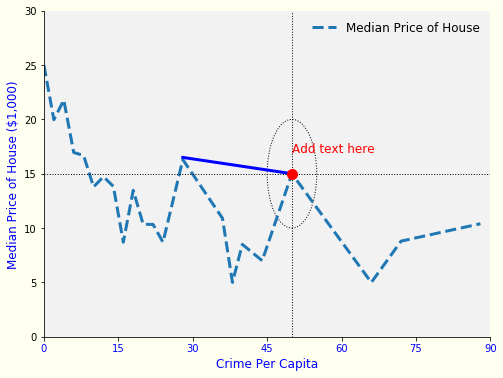

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))                                               # Set figsize
fig.set_facecolor('ivory')                                                           # Set figure background
ax.set_facecolor((0.95, 0.95, 0.95))                                                 # Set ax background

matplotlib.rcParams['font.family'] = 'sans-serif'                                    # Set font style/family

ax = sns.lineplot(
    x=figdata['CRIM_bin'],
    y=figdata['PRICE'],
    ci=None,                                                                         # No error band
)
ax.lines[0].set_linewidth(3)                                                         # Set line width
ax.lines[0].set_linestyle('--')                                                      # Set line stype

ax.set_xlabel('Crime Per Capita', size=12, color='blue')                             # Set X label
plt.xticks(np.arange(0, 100, 15),
           color='blue')                                               # Set X ticks: only available in pyplot
ax.set_xlim(0, 90)                                                                   # Set xlim
ax.set_ylabel('Median Price of House ($1,000)', size=12,
              color='blue')                                                          # Set y label
ax.set_ylim(0, 30)                                                                   # Set ylim

ax.legend(labels=['Median Price of House'],                                          # Set legend
          fontsize=12,
          framealpha=0,                                         # Set transparency of legend background
         )                            
sns.despine(top=True, bottom=False, left=False,
            right=True)                                                             # Set borders of graph
ax.grid(False)                                                                      # Set grid

plt.plot([28, 50], [16.5, 15], linewidth=3, color='b')                              # Add line segment
ax.axhline(15, linewidth=1, color='k', linestyle=':')                               # Add horizontal line
ax.axvline(50, linewidth=1, color='k', linestyle=':')                               # Add vertical line

ax.plot(50, 15, 'or', markersize=10)                                                # Add point
plt.text(50, 17, 'Add text here', size=12, color='r')                               # Add Test

circle = plt.Circle((50, 15),
                    5,
                    color='k',
                    linewidth=1,
                    linestyle=':',
                    fill=False)
ax.add_artist(circle);                                                             # Add circle
# If don't want to display unnecessary explanations above the figure, add ";" after the last command

<a id='time trend-line'></a> 
## Time Trend

**What is the trend of PSI over time**

In [10]:
def gen_timeseries(data):
    data['Date'] = data['Datetime'].dt.date
    data['Year-Month'] = data['Datetime'].apply(
        lambda x: x.strftime('%Y-%m'))
    return data

In [11]:
figdata = gen_timeseries(psi)
figdata = figdata[figdata['Year-Month'] <= '2011-12']

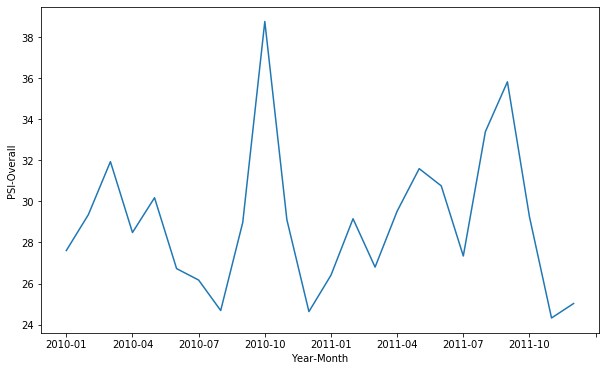

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(figdata['Year-Month'], figdata['PSI-Overall'], ci=None)

ax.xaxis.set_major_locator(ticker.MultipleLocator(3))                              # Set interval for xticks

<a id='density curve-line'></a> 
## Density Curve

**What is the distribution of PSI**

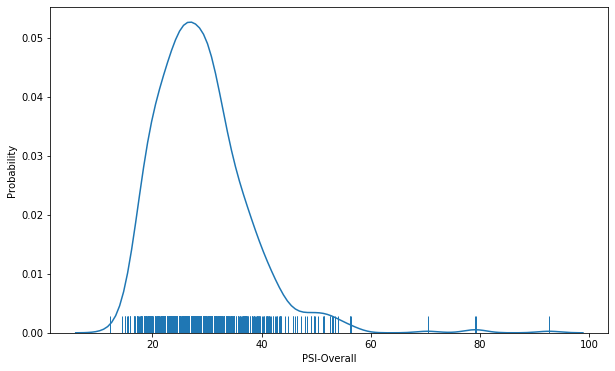

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.distplot(
    figdata['PSI-Overall'],
    hist=False,                                                              # No Histogram
    rug=True,                                                                # Rugged
)
ax.set_ylabel('Probability');

<a id='Bar Graphs'></a> 
# Bar Graphs

We will focus on the standard graph first and some task-specific graphs later:
+ <a href='#standard graph-bar'>standard graph</a>
+ <a href='#histogram-bar'>histogram</a>
+ <a href='#horizontal bar-bar'>horizontal bar</a>

<a id='standard graph-bar'></a> 
## Standard Graph

Follow the same logics as the standard graph above. We won't repeat the same implementation here.

**What is the average NOX regarding different accessibility to road**

In [14]:
def gen_figdata2(data, XVAR, upperbd=None):
    if upperbd is not None:
        data = data[data[XVAR] <= upperbd]

    figdata = data.groupby([XVAR])['NOX'].mean().reset_index()
    figdata.columns = ['RAD', 'Mean_NOX']

    return figdata

In [15]:
figdata = gen_figdata2(data, 'RAD', 10)

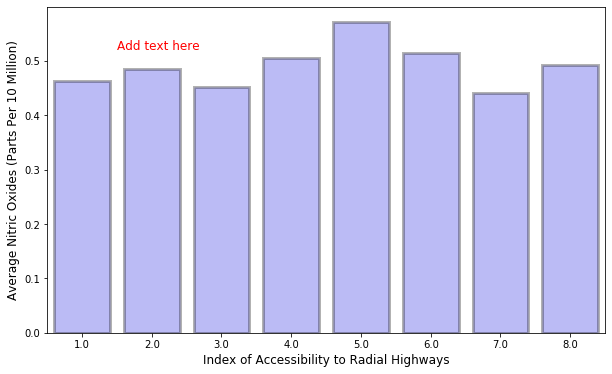

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(
    x='RAD',
    y='Mean_NOX',
    data=figdata,
    color='blue',                                                               # If want a single color
    #palette='hls',                                                             # If want multiple colors
    alpha=0.3,                                                                  # opacity of color
    edgecolor='k',                                                              # edge color
    linewidth=3)                                                                # edge width

ax.set_xlabel('Index of Accessibility to Radial Highways', size=12)
ax.set_ylabel('Average Nitric Oxides (Parts Per 10 Million)', size=12)

plt.text(0.5, 0.52, 'Add text here', size=12, color='r');

<a id='histogram-bar'></a> 
## Histogram

**What is the distribution of accessibility to road**

In [17]:
figdata = data[data['RAD'] < 10]

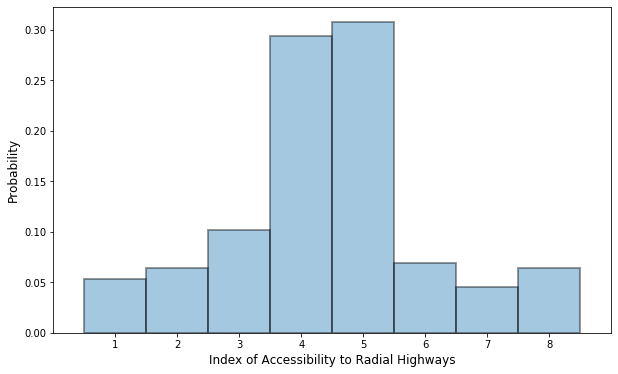

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.arange(0.5, 9, 1)                                      # 1Make xticks right under bars (shift 0.5)
ax = sns.distplot(
    figdata['RAD'],
    kde=False,                                                   # No curve line
    bins=bins,                                                   # 2Make xticks right under bars
    norm_hist=True,                                              # Make probability
    hist_kws=dict(edgecolor="k", linewidth=2))                   # Add edgeline for bars

plt.xticks(np.arange(1, 9, 1))                                   # 3Make xticks right under bars

ax.set_xlim(0, 9)
ax.set_xlabel('Index of Accessibility to Radial Highways', size=12)
ax.set_ylabel('Probability', size=12);

<a id='horizontal bar-bar'></a> 
## Horizontal Bar

**What is the average NOX regarding different accessibility to road**

In [19]:
figdata = gen_figdata2(data, 'RAD', 10)
figdata['RAD'] = figdata['RAD'].astype(str)

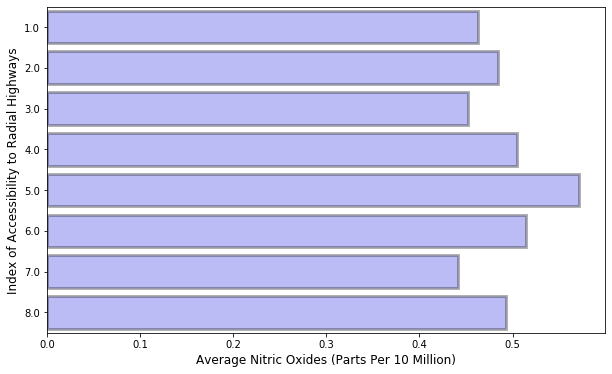

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x=figdata['Mean_NOX'],
                 y=figdata['RAD'],
                 color='blue',                                              
                 alpha=0.3,
                 edgecolor='k',
                 linewidth=3,
                 orient='h')                                              # Horizontal bars

ax.set_ylabel('Index of Accessibility to Radial Highways', size=12)
ax.set_xlabel('Average Nitric Oxides (Parts Per 10 Million)', size=12);

<a id='Dot Graphs'></a> 
# Dot Graphs

We will focus on the standard graph first and some task-specific graphs later:
+ <a href='#standard graph-dot'>standard graph</a>
+ <a href='#scatter wrt. category-dot'>scatter wrt. category</a>

<a id='standard graph-dot'></a> 
## Standard Graph

**What is the relationship between Price and Crime per capita**

Refer to https://www.biaodianfu.com/matplotlib-plot.html for different options of marker

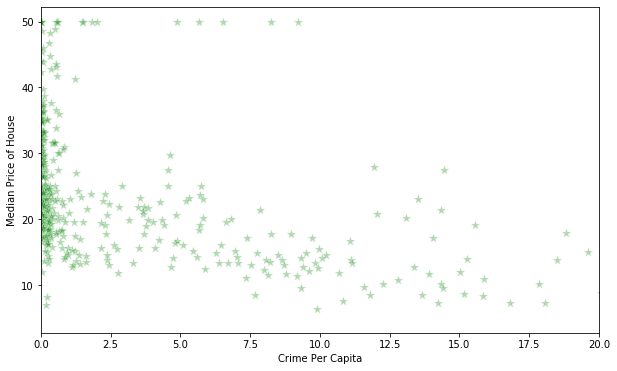

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(
    x=data['CRIM'],
    y=data['PRICE'],
    color='green',                                                 # set color of marker
    marker='*',                                                    # set type of marker
    s=100,                                                         # set size of market
    alpha=0.3,                                                     # set color opacity
)

ax.set_xlabel('Crime Per Capita')
ax.set_xlim(0, 20)
ax.set_ylabel('Median Price of House');

<a id='scatter wrt. category-dot'></a> 
## Scatter wrt. Category

**What is the relationship between house price and crime rate for different accessibility to road**

Attention: when specifying marker options together with color options, there may be error "Filled and line art markers cannot be mixed". Refer to https://github.com/mwaskom/seaborn/issues/1599 for details. Only these marker options can be used together with color options: filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

**Not recommend to set variable for marker sizes together with colors**

In [22]:
figdata = data[data['RAD'] < 5]

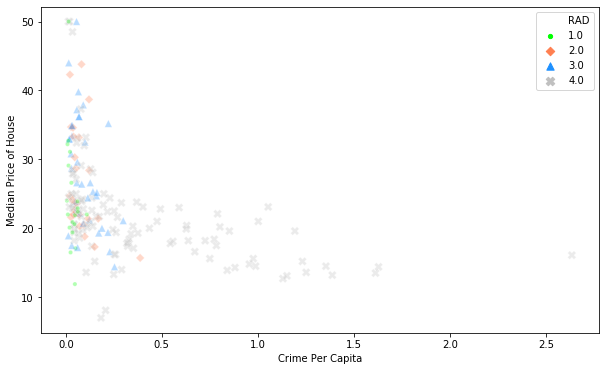

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(
    x=figdata['CRIM'],
    y=figdata['PRICE'],
    hue=figdata['RAD'],                              # Set variable indicating colors
    style=figdata['RAD'],                            # Set variable indicating marker sizes
    size=figdata['RAD'],                             # Set variable indicating marker sizes
    palette={                                        # Set colors for different values, can also use list
        1: 'lime',
        2: 'coral',
        3: 'dodgerblue',
        4: 'silver'
    },
    markers={                                        # Set markers for different values, can also use list
        1: 'o',                                      # Attention: some error due to unfilled marker
        2: 'D',
        3: '^',
        4: 'X'
    },
    alpha=0.3,
)

ax.set_xlabel('Crime Per Capita')
ax.set_ylabel('Median Price of House');

<a id='Area Graphs'></a> 
# Area Graphs

We will focus on the standard graph first and some task-specific graphs later:
+ <a href='#standard graph-area'>standard graph</a>
+ <a href='#stacked area plot-area'>stacked area plot</a>

<a id='standard graph-area'></a> 
## Standard Graph

**What is the trend of PSI over time**

In [24]:
def gen_timeseries2(data):
    data['Date'] = data['Datetime'].dt.date
    data['Year-Month'] = data['Datetime'].apply(lambda x: x.strftime('%Y-%m'))
    figdata = data.groupby(
        ['Year-Month'])['PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
                        'PSI-Central', 'PSI-Overall'].mean().reset_index()

    return figdata

In [25]:
figdata = gen_timeseries2(psi)
figdata = figdata[figdata['Year-Month'] <= '2011-12']

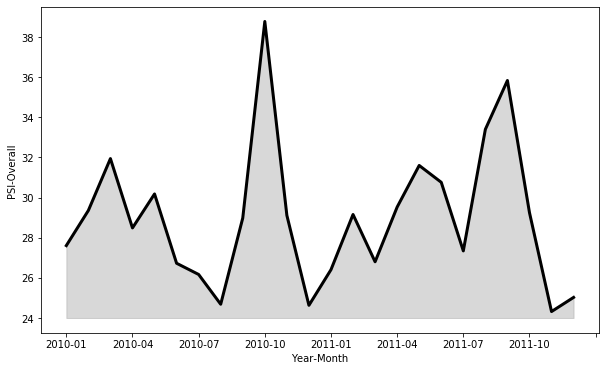

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(x=figdata['Year-Month'],
                y1=figdata['PSI-Overall'],
                y2=24,
                color='grey',
                alpha=0.3)

ax.plot(figdata['Year-Month'], figdata['PSI-Overall'],                        # Set border
        color='k', 
        linewidth=3)

ax.xaxis.set_major_locator(
    ticker.MultipleLocator(3))                                                # Set interval for xticks
ax.set_xlabel('Year-Month')
ax.set_ylabel('PSI-Overall');

<a id='stacked area plot-area'></a> 
## Stacked Area Plot

**What is the trend of PSI over time for different regions**

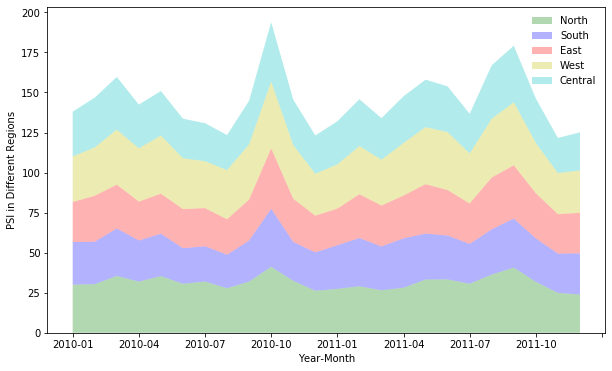

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(
    figdata['Year-Month'],                                       # Set variables to display
    figdata['PSI-North'],
    figdata['PSI-South'],
    figdata['PSI-East'],
    figdata['PSI-West'],
    figdata['PSI-Central'],
    colors=['g', 'b', 'r', 'y',
            'c'],                                                # Set color for different variables in order
    alpha=0.3,
    baseline='zero',                                             # Classical display
#     baseline='sym',                                              # Sysmetric display
#     baseline='wiggle',                                           # Slope minimizing diplay
)

ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
ax.set_xlabel('Year-Month')
ax.set_ylabel('PSI in Different Regions')

ax.legend(labels=('North', 'South', 'East', 'West', 'Central'),
          loc='upperleft',
          framealpha=0,                                         # Set transparency of legend background
         );

<a id='Combo Graphs'></a> 
# Combo Graphs

We will focus on the standard graph first and some task-specific graphs later:
+ <a href='#line + line'>line + line</a>
+ <a href='#line + bar'>line + bar</a>
+ <a href='#bar + bar'>bar + bar</a>
+ <a href='#side by side'>side by side</a>
+ <a href='#multiple plots'>multiple plots</a>

<a id='line + line'></a> 
## Line + Line

**What is the relationship of house price and percentage of low status people wrt. crime rate**

In [28]:
def gen_figdata3(data, XVAR, binwidth):
    figdata = data[[XVAR, 'PRICE', 'LSTAT']]
    figdata[XVAR + '_bin'] = np.floor(
        figdata[XVAR] / binwidth) * binwidth  # use floor
    figdata = figdata.groupby([XVAR + '_bin'
                               ])['PRICE', 'LSTAT'].mean().reset_index()

    return figdata

In [29]:
figdata = gen_figdata3(data, 'CRIM', 2)

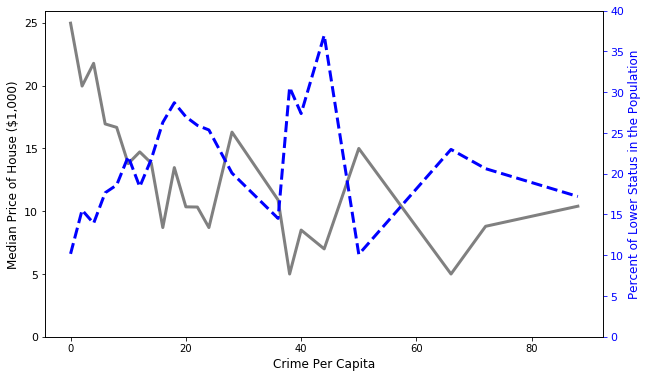

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(figdata['CRIM_bin'], figdata['PRICE'], color='gray', linewidth=3)
ax1.set_xlabel('Crime Per Capita', size=12)
ax1.set_ylabel('Median Price of House ($1,000)', 
               size=12, color='k')
ax1.tick_params(axis='y', 
                colors='k',                                                         # Set tick color
                labelsize=11,                                                       # Set font size of tick
               )
ax1.set_yticks(np.arange(0, 30, 5))

ax2 = ax1.twinx()                                                                   # Share the same xaxis
ax2.plot(figdata['CRIM_bin'],
         figdata['LSTAT'],
         color='b',
         linewidth=3,
         linestyle='--')
ax2.set_ylabel('Percent of Lower Status in the Population', 
               size=12, color='b')
ax2.tick_params(axis='y', colors='b', labelsize=11)
ax2.set_yticks(np.arange(0, 45, 5));

<a id='line + bar'></a> 
## Line + Bar

**What is the relationship of house price and percentage of low status people wrt. crime rate**

In [31]:
figdata = figdata[figdata['CRIM_bin'] <= 20]

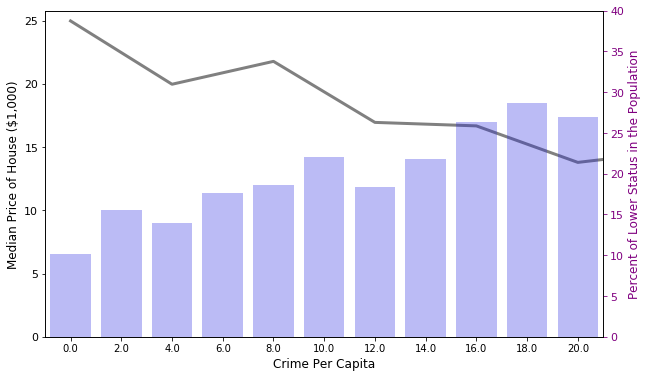

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(figdata['CRIM_bin'], figdata['PRICE'], color='gray', linewidth=3)
ax1.set_xlabel('Crime Per Capita', size=12)
ax1.set_ylabel('Median Price of House ($1,000)', 
               size=12, color='k')
ax1.tick_params(axis='y', 
                colors='k',                                                         # Set tick color
                labelsize=11,                                                       # Set font size of tick
               )
ax1.set_yticks(np.arange(0, 30, 5))

ax2 = ax1.twinx()
ax2 = sns.barplot(figdata['CRIM_bin'],
         figdata['LSTAT'], color='b', alpha=0.3)
ax2.set_ylabel('Percent of Lower Status in the Population', 
               size=12, color='purple')
ax2.tick_params(axis='y', colors='purple', labelsize=11)
ax2.set_yticks(np.arange(0, 45, 5));

<a id='bar + bar'></a> 
## Bar + Bar

**What is the trend of PSI for different regions over time**

In [33]:
def gen_timeseries3(data):
    data['Year'] = data['Datetime'].dt.year
    data['Quarter'] = data['Datetime'].dt.quarter
    data['Year-Quarter'] = data['Year'].astype(str) + '-' + data['Quarter'].astype(str)
    
    figdata = data.groupby(
        ['Year-Quarter'])['PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
                        'PSI-Central', 'PSI-Overall'].mean().reset_index()

    return figdata

In [34]:
figdata = gen_timeseries3(psi)
figdata = figdata[figdata['Year-Quarter'] <= '2010-4']

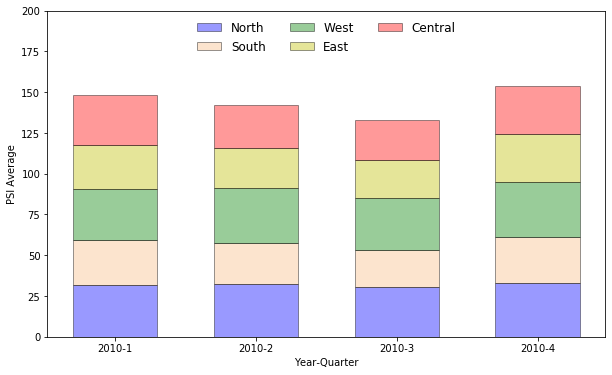

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(figdata['Year-Quarter'],
       figdata['PSI-North'],
       color='blue',
       edgecolor='k',
       alpha=0.4,
       width=0.6)                                                        # Set width of bar
ax.bar(figdata['Year-Quarter'],
       figdata['PSI-South'],
       bottom=figdata['PSI-North'],
       color='#f9bc86',
       alpha=0.4,
       edgecolor='k',
       width=0.6)
ax.bar(figdata['Year-Quarter'],
       figdata['PSI-West'],
       bottom=figdata['PSI-North'] + figdata['PSI-South'],
       color='g',
       alpha=0.4,
       edgecolor='k',
       width=0.6)
ax.bar(figdata['Year-Quarter'],
       figdata['PSI-East'],
       bottom=figdata['PSI-North'] + figdata['PSI-South'] +
       figdata['PSI-West'],
       color='y',
       alpha=0.4,
       edgecolor='k',
       width=0.6)
ax.bar(figdata['Year-Quarter'],
       figdata['PSI-Central'],
       bottom=figdata['PSI-North'] + figdata['PSI-South'] +
       figdata['PSI-West'] + figdata['PSI-East'],
       color='r',
       alpha=0.4,
       edgecolor='k',
       width=0.6)

ax.set_xlabel('Year-Quarter')
ax.set_ylabel('PSI Average')
ax.set_ylim(0, 200)

ax.legend(labels=('North', 'South', 'West', 'East', 'Central'), 
          loc='upper center', 
          ncol=3,                                                            # Set the display of legend
          fontsize=12,
          framealpha=0
         );

<a id='side by side'></a> 
## Side by Side Bars

**What is the trend of PSI for different regions over time**

In [36]:
def gen_timeseries4(data):
    data['Year'] = data['Datetime'].dt.year
    data['Quarter'] = data['Datetime'].dt.quarter
    data['Year-Quarter'] = data['Year'].astype(str) + '-' + data['Quarter'].astype(str)
    
    figdata = data.groupby(
        ['Year-Quarter'])['PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
                        'PSI-Central', 'PSI-Overall'].mean().reset_index()
    figdata = figdata.melt(id_vars=['Year-Quarter'], value_vars=['PSI-North', 'PSI-South', 'PSI-East', 'PSI-West',
                        'PSI-Central'])
    figdata.columns = ['Year-Quarter', 'Region', 'PSI']

    return figdata

In [37]:
figdata = gen_timeseries4(psi)
figdata = figdata[figdata['Year-Quarter'] <= '2010-4']

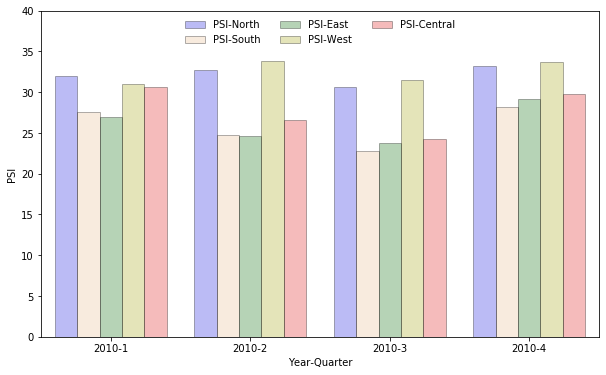

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.barplot(figdata['Year-Quarter'],
                 figdata['PSI'],
                 hue=figdata['Region'],                              # Set variable indicating different colors
                 palette=['blue', '#f9bc86', 'g', 'y', 'r'],         # Set colors for different values
                 edgecolor='k',
                 alpha=0.3)
ax.set_ylim(0, 40)

ax.legend(loc='upper center', ncol=3, framealpha=0);

<a id='multiple plots'></a> 
## Multiple Plots

**What is the trend of PSI for different regions over time**

In [39]:
figdata = gen_timeseries3(psi)
figdata = figdata[figdata['Year-Quarter'] <= '2010-4']

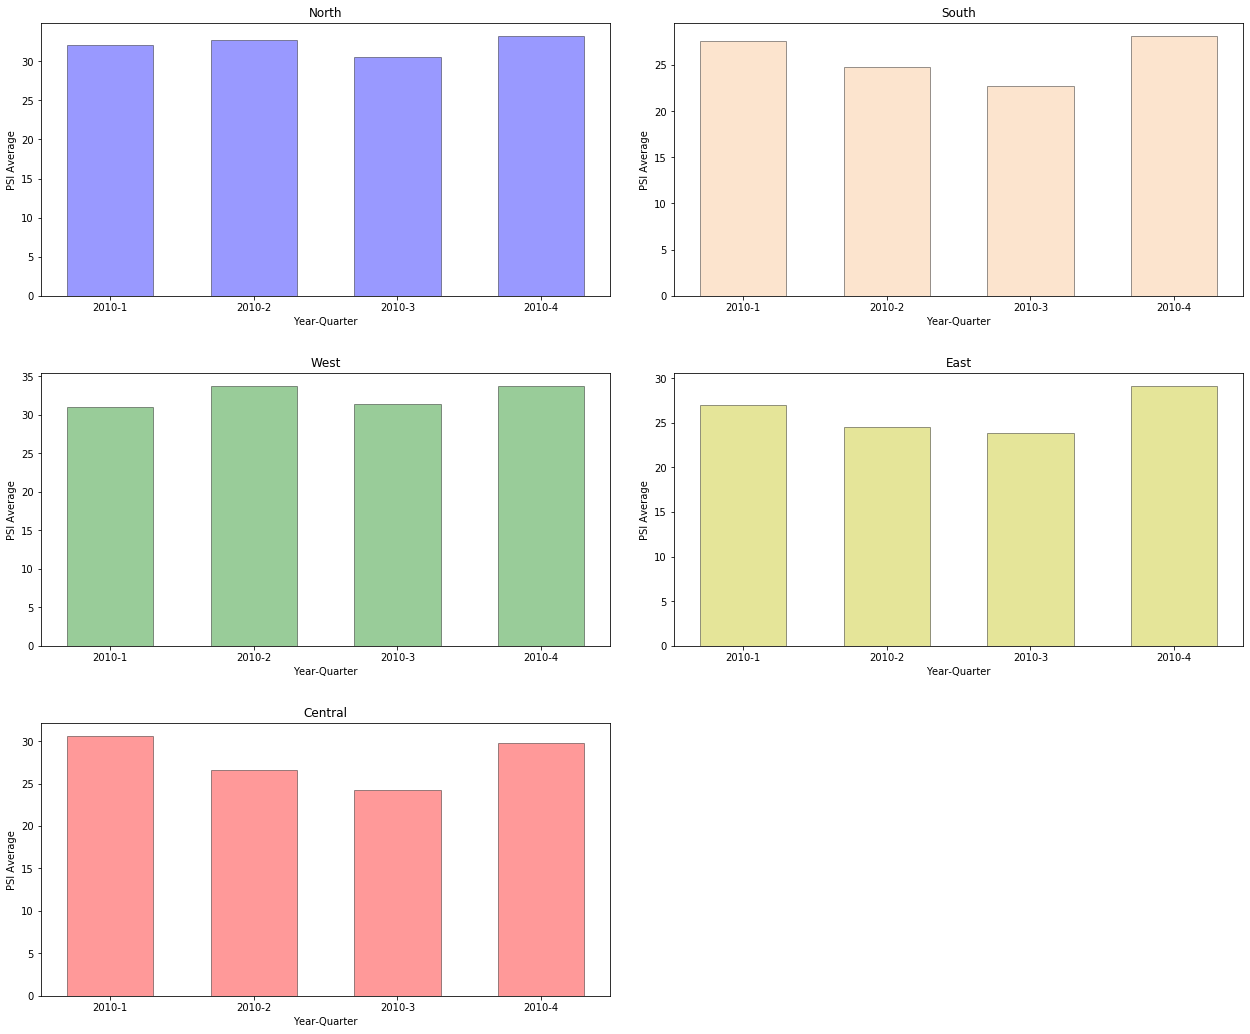

In [40]:
fig = plt.figure(figsize=(18, 15))

ax1 = fig.add_subplot(3, 2, 1)                           # Set for subplot 1: (nrows, ncols, fig_id)
ax1.bar(figdata['Year-Quarter'],
        figdata['PSI-North'],
        color='blue',
        edgecolor='k',
        alpha=0.4,
        width=0.6)
ax1.set_xlabel('Year-Quarter')
ax1.set_ylabel('PSI Average')
ax1.title.set_text('North')

ax2 = fig.add_subplot(3, 2, 2)
ax2.bar(figdata['Year-Quarter'],
        figdata['PSI-South'],
        color='#f9bc86',
        alpha=0.4,
        edgecolor='k',
        width=0.6)
ax2.set_xlabel('Year-Quarter')
ax2.set_ylabel('PSI Average')
ax2.title.set_text('South')

ax3 = fig.add_subplot(3, 2, 3)
ax3.bar(figdata['Year-Quarter'],
        figdata['PSI-West'],
        color='g',
        alpha=0.4,
        edgecolor='k',
        width=0.6)
ax3.set_xlabel('Year-Quarter')
ax3.set_ylabel('PSI Average')
ax3.title.set_text('West')

ax4 = fig.add_subplot(3, 2, 4)
ax4.bar(figdata['Year-Quarter'],
        figdata['PSI-East'],
        color='y',
        alpha=0.4,
        edgecolor='k',
        width=0.6)
ax4.set_xlabel('Year-Quarter')
ax4.set_ylabel('PSI Average')
ax4.title.set_text('East')

ax5 = fig.add_subplot(3, 2, 5)
ax5.bar(figdata['Year-Quarter'],
        figdata['PSI-Central'],
        color='r',
        alpha=0.4,
        edgecolor='k',
        width=0.6)
ax5.set_xlabel('Year-Quarter')
ax5.set_ylabel('PSI Average')
ax5.title.set_text('Central')

fig.tight_layout(pad=3.0);                                            # Increase the spacing btw subplots 

<a id='Specific Graphs'></a> 
# Specific Graphs

We will focus on the standard graph first and some task-specific graphs later:
+ <a href='#boxplot'>boxplot</a>
+ <a href='#violin plot'>violin plot</a>
+ <a href='#forest'>forest</a>
+ <a href='#heatmap'>heatmap</a>

<a id='boxplot'></a> 
## Boxplot

**What is the distribution of PSI in different quarters?**

![png](colormap.png) 
From Michael Galarnyk: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [41]:
def gen_timeseries5(data):
    data['Year'] = data['Datetime'].dt.year
    data['Quarter'] = data['Datetime'].dt.quarter
    data['Year-Quarter'] = data['Year'].astype(
        str) + '-' + data['Quarter'].astype(str)
    figdata = data.copy()
    
    return figdata

In [42]:
figdata = gen_timeseries5(psi)
figdata = figdata[(figdata['Year-Quarter'] <= '2010-4')][['Year-Quarter', 'PSI-Overall']]

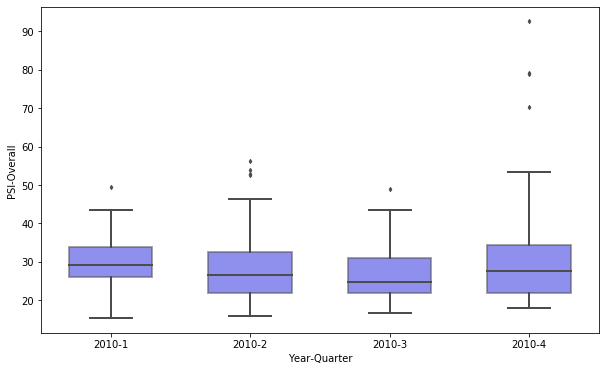

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.boxplot(figdata['Year-Quarter'],
                 figdata['PSI-Overall'],
                 color='b',
                 boxprops=dict(alpha=0.5),                               # Set color transparency of box
                 width=0.6,                                              # Set width of box
                 linewidth=2,                                            # Set linewidth
                 fliersize=3,                                            # Set size of outlier points
                 whis=1.5,                                               # Set outlier boundary: 1.5 IQR
                )

<a id='violin plot'></a> 
## Violin Plot

**What is the distribution of PSI in different quarters?**

<img src="violin explain.png" width=400 height=500 />
From JOEL CARRON: https://mode.com/blog/violin-plot-examples/

In [44]:
figdata = gen_timeseries5(psi)
figdata = figdata[(figdata['Year-Quarter'] <= '2010-4')][['Year-Quarter', 'PSI-Overall']]

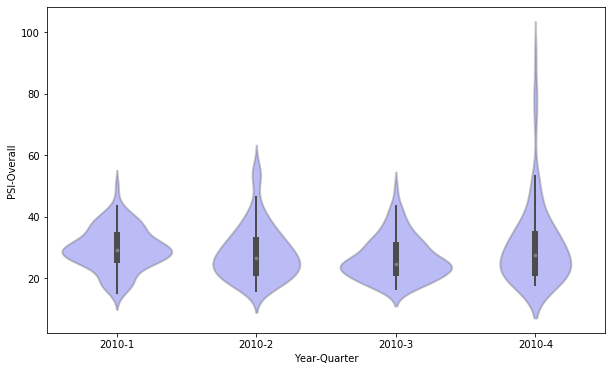

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.violinplot(
    figdata['Year-Quarter'],
    figdata['PSI-Overall'],
    color='b',
    inner='box',                                                       # Different options for inner display
#     inner='quartile',
#     inner='point',
#     inner='stick',
    linewidth=2,                                                       # Set linewidth for inner line
)

plt.setp(ax.collections, alpha=.3);                                    # Set transparency for filled color

<a id='forest'></a> 
## Forest

**What is the distribution of PSI in different quarters?**

In [46]:
figdata = gen_timeseries5(psi)
figdata = figdata[(figdata['Year-Quarter'] <= '2010-4')
                  & (figdata['PSI-Overall'] <= 40)][[
                      'Year-Quarter', 'PSI-Overall'
                  ]]

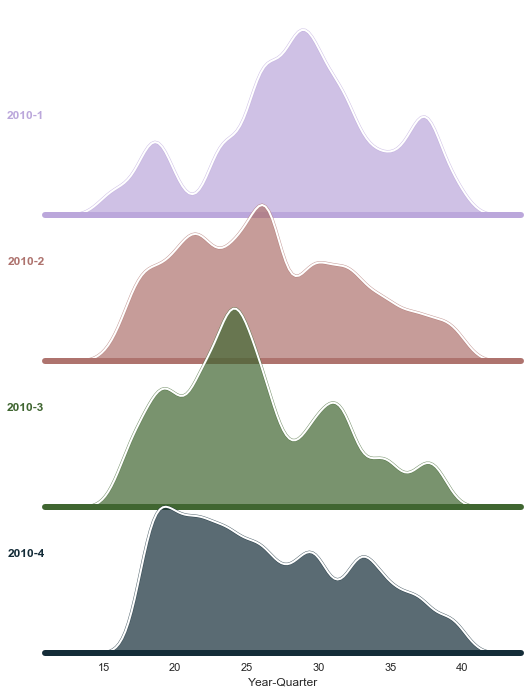

In [47]:
# fig, ax = plt.subplots(figsize=(10, 6))
sns.set(
    style="white", 
    rc={"axes.facecolor": (0, 0, 0, 0)}                                     # Set transparent background
    )

palette = sns.cubehelix_palette(4,                                          # Set number of colors
                                start=0.3,                                  # Set color by (start, rot)
                                rot=-1.5, 
                                light=0.7,                                  # Set the lightest color
                               )
g = sns.FacetGrid(
    figdata,
    row="Year-Quarter",
    hue="Year-Quarter",
    aspect=3,                                                               # Set ratio of width:height
    height=2.5,
    palette=palette,                                                        # Set color
)

g.map(sns.kdeplot,                                                          # Set figure for each facet
      'PSI-Overall',                                                        # Set y label
      clip_on=True,
      shade=True,                                                           # Fill in the shape with color
      alpha=0.7,
      lw=3,                                                                 # Set outline width of shape
      bw=1,                                                                 # Set binwith for density smooth
     )

g.map(sns.kdeplot, "PSI-Overall",                                           # Set white outline for each shape
      clip_on=False, 
      color="w", 
      lw=2, 
      bw=1)

g.map(plt.axhline,                                                          # Add the bottom line
      y=0, 
      lw=6, 
      clip_on=False)

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 0.5, 
            label, 
            fontweight="bold", 
            fontsize=12,
            color=color,
            ha="right",                                                     # Horizontal alignment
            va="top",                                                       # Vertical alignment
            transform=ax.transAxes,                                         # TransAxes: coordinate of Axes
           )                                                                # For each facet: reset coordinate
g.map(label, "Year-Quarter")

g.fig.subplots_adjust(hspace=-0.3)

g.set_titles("")                                                            # Turn off the title
g.set(yticks=[])                                                            # Turn off y ticks
g.despine(bottom=True, left=True);                                          # Turn off border lines

<a id='heatmap'></a> 
## Heatmap

In [48]:
def gen_figdata4(data):
    data = data[['CRIM', 'NOX', 'AGE', 'PTRATIO', 'PRICE']]
    figdata = data.corr()
    
    return figdata

In [49]:
figdata = gen_figdata4(data)

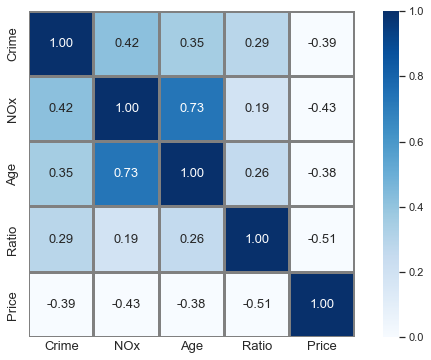

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(
    figdata,
    vmin=0,                                                                # Set min for color bar
    vmax=1,                                                                # Set max for color bar
    cmap='Blues',
    annot=True,                                                            # Display value in cells
    fmt='0.2f',
    annot_kws={'fontsize': 13},                                            # Set details for values in cells
    linewidths=2,                                                          # Set line width for table border
    linecolor='grey',
    cbar=True,                                                             # Display color bar
    square=True,                                                           # Cell is square
    xticklabels=['Crime', 'NOx', 'Age', 'Ratio', 'Price'],                 # Value for ticks, or can use "auto"
    yticklabels=['Crime', 'NOx', 'Age', 'Ratio', 'Price'],
)

ax.set_xticklabels(ax.get_xmajorticklabels(),                              # Set details for x ticks
                   fontsize=13, 
                   va='center')
ax.set_yticklabels(ax.get_ymajorticklabels(),                              # Set details for y ticks
                   fontsize=13, 
                   va='center');